In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
import imblearn.over_sampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
import imblearn.over_sampling

# Data Preparation & EDA

## Loading data and exploring the target and features

In [4]:
df = pd.read_csv('data.csv')
label = pd.read_csv('label.csv')

In [5]:
df.head(3)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo


In [6]:
label.head(3)

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0


In [7]:
df = pd.merge(df, label, left_on = 'respondent_id', right_on = 'respondent_id')

In [8]:
df.head(3)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0


In [9]:
df.shape

(26707, 38)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [11]:
print('h1n1:','\n',df.h1n1_vaccine.value_counts())
print('seasonal:','\n',df.seasonal_vaccine.value_counts())

h1n1: 
 0    21033
1     5674
Name: h1n1_vaccine, dtype: int64
seasonal: 
 0    14272
1    12435
Name: seasonal_vaccine, dtype: int64


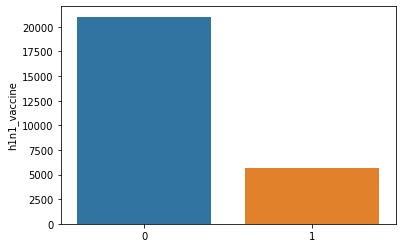

In [12]:
sns.barplot(data = df, x = df.h1n1_vaccine.unique(), y = df.h1n1_vaccine.value_counts())

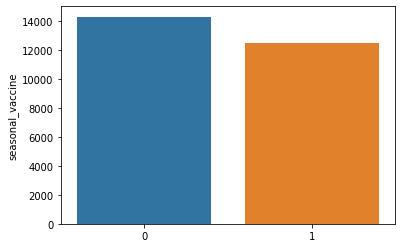

In [13]:
sns.barplot(data = df, x = df.seasonal_vaccine.unique(), y = df.seasonal_vaccine.value_counts())

In [14]:
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [15]:
for col in df.columns[1:-2]:
    print(col ,df[col].unique())

h1n1_concern [ 1.  3.  2.  0. nan]
h1n1_knowledge [ 0.  2.  1. nan]
behavioral_antiviral_meds [ 0.  1. nan]
behavioral_avoidance [ 0.  1. nan]
behavioral_face_mask [ 0.  1. nan]
behavioral_wash_hands [ 0.  1. nan]
behavioral_large_gatherings [ 0.  1. nan]
behavioral_outside_home [ 1.  0. nan]
behavioral_touch_face [ 1.  0. nan]
doctor_recc_h1n1 [ 0. nan  1.]
doctor_recc_seasonal [ 0. nan  1.]
chronic_med_condition [ 0.  1. nan]
child_under_6_months [ 0.  1. nan]
health_worker [ 0.  1. nan]
health_insurance [ 1. nan  0.]
opinion_h1n1_vacc_effective [ 3.  5.  4.  2.  1. nan]
opinion_h1n1_risk [ 1.  4.  3.  2.  5. nan]
opinion_h1n1_sick_from_vacc [ 2.  4.  1.  5.  3. nan]
opinion_seas_vacc_effective [ 2.  4.  5.  3.  1. nan]
opinion_seas_risk [ 1.  2.  4.  3.  5. nan]
opinion_seas_sick_from_vacc [ 2.  4.  1.  5. nan  3.]
age_group ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
education ['< 12 Years' '12 Years' 'College Graduate' 'Some College' nan]
race ['

In [16]:
for col in df.columns[1:-2]:
    print(col)

h1n1_concern
h1n1_knowledge
behavioral_antiviral_meds
behavioral_avoidance
behavioral_face_mask
behavioral_wash_hands
behavioral_large_gatherings
behavioral_outside_home
behavioral_touch_face
doctor_recc_h1n1
doctor_recc_seasonal
chronic_med_condition
child_under_6_months
health_worker
health_insurance
opinion_h1n1_vacc_effective
opinion_h1n1_risk
opinion_h1n1_sick_from_vacc
opinion_seas_vacc_effective
opinion_seas_risk
opinion_seas_sick_from_vacc
age_group
education
race
sex
income_poverty
marital_status
rent_or_own
employment_status
hhs_geo_region
census_msa
household_adults
household_children
employment_industry
employment_occupation


In [17]:
for col in df.columns:
    df[col].fillna(df[col].mode()[0], inplace = True)

# Baseline with a logistic regression

## Feature Engeenering

### Treating categorical variable properly

In [105]:
df_2 = df.copy()

In [106]:
# In the particular feature, 'employment_status', there are two relevant categories so combining those as 'unemployed'.

df_2['employment_status'] = ['Unemployed' if status == 'Not in Labor Force' else status for status in df.employment_status]
df_2.employment_status.unique()

array(['Unemployed', 'Employed'], dtype=object)

In [107]:
# Treating ordinal variables to make sure that they are encoded in the correct orders.

education_lvl = [['< 12 Years','12 Years','College Graduate','Some College']]
age_lvl = [['18 - 34 Years','35 - 44 Years','45 - 54 Years','55 - 64 Years','65+ Years']]
income_lvl = [['Below Poverty','<= $75,000, Above Poverty','> $75,000']]

transformer = make_column_transformer(
    (OrdinalEncoder(categories=education_lvl), ['education']),
    (OrdinalEncoder(categories=age_lvl), ['age_group']),
    (OrdinalEncoder(categories=income_lvl), ['income_poverty'])
)

transformer.fit_transform(df_2)

array([[0., 3., 0.],
       [1., 1., 0.],
       [2., 0., 1.],
       ...,
       [3., 3., 1.],
       [3., 0., 1.],
       [3., 4., 1.]])

In [108]:
ordinal = OrdinalEncoder()

ordinal.fit(df_2[['h1n1_concern','h1n1_knowledge','opinion_h1n1_vacc_effective','opinion_h1n1_risk',
                'opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective','opinion_seas_risk',
                'opinion_seas_sick_from_vacc','household_adults','household_children','education','age_group']])

df_2[['h1n1_concern','h1n1_knowledge','opinion_h1n1_vacc_effective','opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective','opinion_seas_risk',
    'opinion_seas_sick_from_vacc','household_adults','household_children','education','age_group']] = ordinal.transform(df_2[['h1n1_concern',
                                                                                                    'h1n1_knowledge','opinion_h1n1_vacc_effective',
                        'opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective',
                        'opinion_seas_risk','opinion_seas_sick_from_vacc','household_adults','household_children','education','age_group']])

In [109]:
#creating dummy variables for categorical variables
df_2 = pd.get_dummies(df_2, columns =['race','sex','income_poverty',
                                    'marital_status','rent_or_own','employment_status','census_msa','hhs_geo_region',
                                     'employment_industry','employment_occupation'], drop_first = True)

In [97]:
y = df_2.h1n1_vaccine
X = df_2.drop(labels = ['h1n1_vaccine','respondent_id','seasonal_vaccine'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .25, random_state = 42)

In [99]:
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)

logit = LogisticRegression(C=1000) # setting C very high essentially removes regularization
logit.fit(X_train_scaled, y_train)

y_predict = logit.predict(X_train_scaled) 
logit.score(X_train_scaled, y_train)

0.8350496161767459

In [65]:
std_scale = StandardScaler()
X_val_scaled = std_scale.fit_transform(X_val)

logit = LogisticRegression(C=1000) # setting C very high essentially removes regularization
logit.fit(X_val_scaled, y_val)
logit.score(X_val_scaled, y_val)

0.847809809060277

In [66]:
y_pred = logit.predict(X_val_scaled) 

print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))
print("f1:",metrics.f1_score(y_val, y_pred))

Accuracy: 0.847809809060277
Precision: 0.6797101449275362
Recall: 0.4420358152686145
f1: 0.5356938892061679


ROC AUC score =  0.8537081962008665


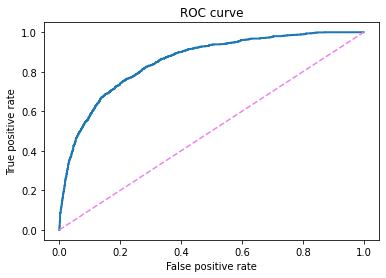

In [67]:
fpr, tpr, thresholds = roc_curve(y_val, logit.predict_proba(X_val_scaled)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_val, logit.predict_proba(X_val_scaled)[:,1]))

### Class Imbalance

In [27]:
# setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 3, 0 : n_neg} 

smote = imblearn.over_sampling.SMOTE(sampling_strategy=ratio, random_state = 42)

X_tr_smote, y_tr_smote = smote.fit_resample(X_train_scaled, y_train)

lr_smote = LogisticRegression(solver='liblinear') 
lr_smote.fit(X_tr_smote, y_tr_smote)

print('Logistic Regression on SMOTE Train Data; Test Recall: %.3f, Test AUC: %.3f' % \
      (recall_score(y_val, lr_smote.predict(X_val_scaled)), roc_auc_score(y_val, lr_smote.predict_proba(X_val_scaled)[:,1])))

Logistic Regression on SMOTE Train Data; Test Recall: 0.697, Test AUC: 0.841


### Grid Search with Logistic Regression

In [115]:
y = df_2.h1n1_vaccine
X = df_2.drop(labels = ['h1n1_vaccine','respondent_id','seasonal_vaccine'], axis = 1)

In [117]:
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define model
model = LogisticRegression()

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X, y)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/Users/hyewonjeong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.83680941 0.83678447        nan        nan        nan 0.78754635
 0.78754635 0.78754635 0.78754635        nan        nan        nan
 0.83680941 0.83678447        nan        nan        nan 0.78754635
 0.78755882 0.78755882 0.78740907        nan        nan        nan
 0.83680941 0.83678447        nan        nan        nan 0.78765864
 0.82469035 0.82469035 0.81384412        nan        nan        nan
 0.83680941 0.83678447        nan        nan        nan 0.83004462
 0.8349872  0.83494976 0.83093076        nan        nan        nan
 0.83680941 0.83678447        nan        nan        nan 0.83622279
 0.83680944 0.83687185 0.83527423        nan        nan        nan
 0.83680941 0.83678447        nan        nan        nan 0.83653487
 0.83673453 0.83669708 0.83655981        nan        nan        nan
 0.83680941 0.83678447        nan  

Best Score: 0.836871848227903
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


/Users/hyewonjeong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
y = df_2.h1n1_vaccine
X = df_2.drop(labels = ['h1n1_vaccine','respondent_id','seasonal_vaccine'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .25, random_state = 42)

In [122]:
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)

logit = LogisticRegression(C = 0.1, penalty= 'l2', solver = 'lbfgs')
logit.fit(X_train_scaled, y_train)

y_predict = logit.predict(X_train_scaled) 
logit.score(X_train_scaled, y_train)

0.834737564750671

In [124]:
std_scale = StandardScaler()
X_val_scaled = std_scale.fit_transform(X_val)

y_predict = logit.predict(X_val_scaled) 
logit.score(X_val_scaled, y_val)

0.8433171096967428

In [125]:
y_pred = logit.predict(X_val_scaled) 

print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))
print("f1:",metrics.f1_score(y_val, y_pred))

Accuracy: 0.8433171096967428
Precision: 0.6485411140583555
Recall: 0.46088595664467485
f1: 0.5388429752066116


### Feature importance & Feature selection

#### Feature importance

Feature: 0, Score: -0.07531
Feature: 1, Score: 0.04564
Feature: 2, Score: 0.05487
Feature: 3, Score: -0.04940
Feature: 4, Score: 0.01194
Feature: 5, Score: 0.00215
Feature: 6, Score: -0.03563
Feature: 7, Score: -0.07814
Feature: 8, Score: 0.07052
Feature: 9, Score: 0.93515
Feature: 10, Score: -0.27781
Feature: 11, Score: 0.00086
Feature: 12, Score: 0.04865
Feature: 13, Score: 0.17181
Feature: 14, Score: -0.02093
Feature: 15, Score: 0.55611
Feature: 16, Score: 0.37108
Feature: 17, Score: 0.00405
Feature: 18, Score: 0.07284
Feature: 19, Score: 0.25883
Feature: 20, Score: -0.10925
Feature: 21, Score: 0.25689
Feature: 22, Score: -0.02359
Feature: 23, Score: -0.00775
Feature: 24, Score: 0.05503
Feature: 25, Score: 0.07463
Feature: 26, Score: 0.22439
Feature: 27, Score: 0.21214
Feature: 28, Score: 0.07053
Feature: 29, Score: -0.00135
Feature: 30, Score: 0.00443
Feature: 31, Score: -0.05932
Feature: 32, Score: -0.09227
Feature: 33, Score: -0.03449
Feature: 34, Score: 0.03619
Feature: 35, Scor

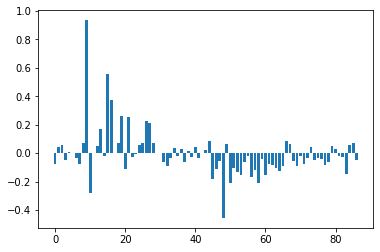

In [31]:
importance = logit.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [32]:
df_3 = df.copy()

In [33]:
y = df_3.h1n1_vaccine
X = df_3[['doctor_recc_h1n1','employment_industry','employment_occupation',
         'opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_seas_risk','age_group']]


ordinal = OrdinalEncoder()

ordinal.fit(X[['opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_seas_risk','age_group']])

X[['opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_seas_risk','age_group']]= \
ordinal.transform(X[['opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_seas_risk','age_group']])

X = pd.get_dummies(X, columns =['doctor_recc_h1n1','employment_industry','employment_occupation'], drop_first = True)

<ipython-input-33-c6ef3f37a08e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_seas_risk','age_group']]= \
/Users/hyewonjeong/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42, stratify = y )
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .25, random_state = 42)

std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)

logit_selected = LogisticRegression(C=1000) # setting C very high essentially removes regularization
logit_selected.fit(X_train_scaled, y_train)

y_predict = logit_selected.predict(X_train_scaled) 
logit_selected.score(X_train_scaled, y_train)

0.8289334082256756

In [35]:
std_scale = StandardScaler()
X_val_scaled = std_scale.fit_transform(X_val)

logit_selected = LogisticRegression(C=1000) # setting C very high essentially removes regularization
logit_selected.fit(X_val_scaled, y_val)

y_predict = logit_selected.predict(X_train_scaled) 
logit_selected.score(X_val_scaled, y_val)

0.8423811306626732

In [36]:
y_pred = logit_selected.predict(X_val_scaled) 
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))
print("f1:",metrics.f1_score(y_val, y_pred))

Accuracy: 0.8423811306626732
Precision: 0.6718995290423861
Recall: 0.40339302544769085
f1: 0.5041224970553592


In [37]:
# setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 3, 0 : n_neg} 

smote = imblearn.over_sampling.SMOTE(sampling_strategy=ratio, random_state = 42)

X_tr_smote, y_tr_smote = smote.fit_resample(X_train_scaled, y_train)

lr_smote = LogisticRegression(solver='liblinear') 
lr_smote.fit(X_tr_smote, y_tr_smote)

print('Logistic Regression on SMOTE Train Data; Test Recall: %.3f, Test AUC: %.3f' % \
      (recall_score(y_val, lr_smote.predict(X_val_scaled)), roc_auc_score(y_val, lr_smote.predict_proba(X_val_scaled)[:,1])))

Logistic Regression on SMOTE Train Data; Test Recall: 0.696, Test AUC: 0.835


# Naive Bayes 

In [131]:
y = df_2.h1n1_vaccine
X = df_2.drop(labels = ['h1n1_vaccine','respondent_id','seasonal_vaccine'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42, stratify= y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .25, random_state = 42)

In [132]:
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)

nb = BernoulliNB()
nb.fit(X_train_scaled, y_train)
nb.score(X_train_scaled, y_train)

0.7907383136740935

In [133]:
std_scale = StandardScaler()
X_val_scaled = std_scale.fit_transform(X_val)

nb = BernoulliNB()
nb.fit(X_val_scaled, y_val)
nb.score(X_val_scaled, y_val)

0.8010108573567952

In [134]:
y_pred =nb.predict(X_val_scaled) 
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))
print("f1:",metrics.f1_score(y_val, y_pred))

Accuracy: 0.8010108573567952
Precision: 0.49917898193760263
Recall: 0.5730442978322338
f1: 0.5335673541026766


In [135]:
# setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 3, 0 : n_neg} 

smote = imblearn.over_sampling.SMOTE(sampling_strategy=ratio, random_state = 42)

X_tr_smote, y_tr_smote = smote.fit_resample(X_train_scaled, y_train)

nb_smote = BernoulliNB() 
nb_smote.fit(X_tr_smote, y_tr_smote)

print('Logistic Regression on SMOTE Train Data; Test Recall: %.3f, Test AUC: %.3f' % \
      (recall_score(y_val, nb_smote.predict(X_val_scaled)), roc_auc_score(y_val, nb_smote.predict_proba(X_val_scaled)[:,1])))

Logistic Regression on SMOTE Train Data; Test Recall: 0.687, Test AUC: 0.807


### Random Forest 

In [71]:
y = df_2.h1n1_vaccine
X = df_2.drop(labels = ['h1n1_vaccine','respondent_id','seasonal_vaccine'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42, stratify= y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .25, random_state = 42)

In [72]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [73]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [74]:
rf = RandomForestClassifier()

In [75]:
rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, verbose=2, n_jobs = 4)

In [76]:
rf_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [77]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 10}

In [78]:
rf = RandomForestClassifier(bootstrap=True, max_depth = 4, max_features= 'sqrt',min_samples_leaf = 2, 
                            min_samples_split = 2, n_estimators= 10)

In [80]:
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.7912375959558136

In [81]:
rf.score(X_val, y_val)

0.8113066267315612

In [82]:
y_pred=rf.predict(X_val)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))
print("f1:",metrics.f1_score(y_val, y_pred))

Accuracy: 0.8113066267315612
Precision: 0.8732394366197183
Recall: 0.058435438265786996
f1: 0.10954063604240283


### XGBoost

In [87]:
y = df_2.h1n1_vaccine
X = df_2.drop(labels = ['h1n1_vaccine','respondent_id','seasonal_vaccine'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42, stratify= y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .25, random_state = 42)

In [88]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [54]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [55]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [56]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True
)

In [57]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/Users/hyewonjeong/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:20:10] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                                     subsample=Non

In [58]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [91]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [92]:
xgb.fit(X_train, y_train)
xgb.score(X_train, y_train)

[15:02:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8497784434874868

In [93]:
xgb.score(X_val, y_val)

0.8444402845376263

In [94]:
y_pred=xgb.predict(X_val)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))
print("f1:",metrics.f1_score(y_val, y_pred))

Accuracy: 0.8444402845376263
Precision: 0.6501305483028721
Recall: 0.46936852026390197
f1: 0.5451559934318555


# Test scores on Holdout 

In [129]:
y = df_2.h1n1_vaccine
X = df_2.drop(labels = ['h1n1_vaccine','respondent_id','seasonal_vaccine'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42, stratify= y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .25, random_state = 42)

In [136]:
std_scale = StandardScaler()
X_test_scaled = std_scale.fit_transform(X_test)

nb.fit(X_test_scaled, y_test)
nb.score(X_test_scaled, y_test)

0.8021340321976788

In [137]:
y_pred = nb.predict(X_test_scaled) 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8021340321976788
Precision: 0.5328282828282829
Recall: 0.5577092511013216
f1: 0.5449849332759364


ROC AUC score =  0.7921383387662055


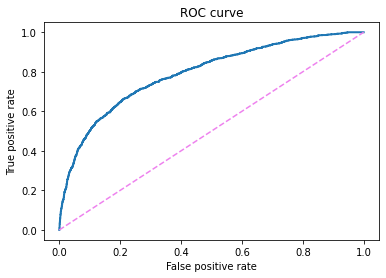

In [138]:
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test_scaled)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, nb.predict_proba(X_test_scaled)[:,1]))

In [141]:
from sklearn.metrics import confusion_matrix
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test_scaled)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.BuGn, annot=True, square=True, fmt='d',
           xticklabels=['non-vaccinated', 'vaccinated'],
           yticklabels=['non-vaccinated', 'vaccinated']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

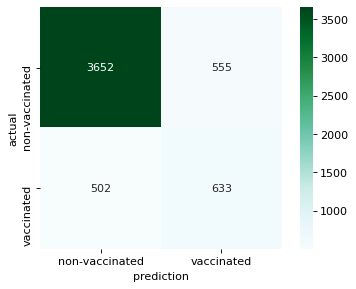

In [142]:
make_confusion_matrix(nb)

In [54]:
# logistic regression with the entire features
std_scale = StandardScaler()
X_test_scaled = std_scale.fit_transform(X_test)

logit = LogisticRegression(C=1000) # setting C very high essentially removes regularization
logit.fit(X_test_scaled, y_test)
logit.score(X_test_scaled, y_test)

0.840134780980906

In [55]:
y_pred = logit.predict(X_test_scaled) 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.840134780980906
Precision: 0.689608636977058
Recall: 0.4502202643171806
f1: 0.5447761194029851


In [38]:
# logistic regression with feature selection

std_scale = StandardScaler()
X_test_scaled = std_scale.fit_transform(X_test)

logit_selected = LogisticRegression(C=1000) # setting C very high essentially removes regularization
logit_selected.fit(X_test_scaled, y_test)

y_predict = logit_selected.predict(X_test_scaled) 
logit_selected.score(X_test_scaled, y_test)

0.8371396480718832

In [39]:
y_pred = logit_selected.predict(X_test_scaled) 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8371396480718832
Precision: 0.6842837273991655
Recall: 0.43348017621145374
f1: 0.5307443365695793


ROC AUC score =  0.8400785768213037


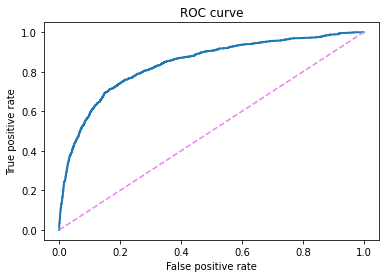

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, logit.predict_proba(X_test_scaled)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, logit.predict_proba(X_test_scaled)[:,1]))